# Convert image files into a tensor and back with FastAi, PIL, Torchvision and  Vanilla Pytorch 
> Some basic processes may seem obvious for the most, but for me as a beginner, It takes some time and experiment to become familiar some topics. Image processing for Deep learning is one of them. This post is an attempt to understand the process of opening an image file converting to a tensor and after training process convert back into a image. My favorite library FastAi makes all these possible without a big effort but sometimes, especially when playing with the data, it is very useful to understand the basics.
- toc: true 
- badges: true
- comments: true
- categories: [fastbook,data,fastai]
- image: images/Fastai.png

In [1]:
import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastbook import *
# below is for disabling Jedi autocomplete that doesn't work well in my computer.
#Please comment it out if it was not a case for you.
%config Completer.use_jedi = False

> Note: This image created by NightCafe creator with one word text input: "FastAi" [NightCafe is here](https://creator.nightcafe.studio/)

<img alt="FastAi" width="300" caption="Created with NightCafe" src="images/image_explorations/Fastai.jpg"/>

### This is where my data (image) is located ( a path to a folder)

> Note: Understanding "Path" class is an another topic. In our case we can think Path as a location in a computer. 

In [2]:
path = Path('images/image_explorations')
path

Path('images/image_explorations')

### This is how I open a particular image in a folder:

> Note: PIL is the Python Imaging Library by Fredrik Lundh and Contributors. Most known fork is Pillow and if you want to look deeper please follow this link: [Pillow Documents](https://pillow.readthedocs.io/en/stable/index.html)

In [4]:
Im = PILImage.create(path/'Fastai.jpg')

### Now we have a PILimage

In [5]:
type(Im)

fastai.vision.core.PILImage

> Tip: There is no need to install PIL if you have FastAi. It is included in the library.

### This is how we see it.

<AxesSubplot:>

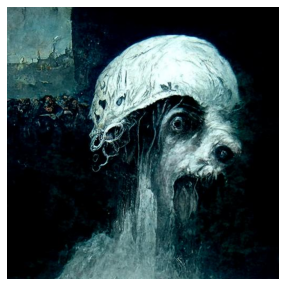

In [6]:
Im.show()

## This is how a PILimage converted into a Pytorch tensor manually

> Note: Just pass the PIlimage to tensor method.

In [7]:
Im_tensor = tensor(Im)

#### Shape of the tensor is:

In [8]:
Im_tensor.shape

torch.Size([512, 512, 3])

#### RGB values at x , y (300,700) location: Values are : 33, 64, 67

In [11]:
Im_tensor[220][220]

tensor([33, 64, 67], dtype=torch.uint8)

#### Change the order of the tensor

> Tip: Sometimes(almost everytime) it is important to keep the tensor dimension in a particular order. In this case it is "C * H * W" (channel x heigh x weigh). It is easy with "permute" method.

In [12]:
Im_tensor = Im_tensor.permute(2,0,1)

#### Now the shape is right.

In [13]:
Im_tensor.shape

torch.Size([3, 512, 512])

#### The result is 217 (type:tensor)

> Important: At the location of 220 and 220, the value of the "red" channel is 33. Please keep this is in mind. We will see this exact number in other methods too.

In [15]:
Im_tensor[0][220][220]

tensor(33, dtype=torch.uint8)

## Now we will use Torchvision ToTensor class for the same process.

> Note: Torchvision library is part of the PyTorch project. It used for transforming images, contain pretrained models and datasets etc. Below we import transforms from the library.

In [16]:
import torchvision.transforms as T

In [17]:
torchvis_transform = T.ToTensor()

In [18]:
Img_torchvis = torchvis_transform(Im)

> Important: With Torchvision, we do not need to arrange the order of tensor dimension, It is already how is expected. "C * H * W" (channel x heigh x weigh).

In [19]:
Img_torchvis.shape

torch.Size([3, 512, 512])

#### The result is now 0.1294 (tensor)

> Note: The result is not 33 but 0.1294. Same location but different value. Why?

In [22]:
Img_torchvis[0][220][220]

tensor(0.1294)

> Note: type is same

In [23]:
type(Img_torchvis)

torch.Tensor

## Finally, fast.ai ToTensor class

In [24]:
doc(ToTensor )

> Note: There is a ToTensor Class in the FastAi library but I believe the behaviour is slightly different than the previous examples.

In [25]:
transform = ToTensor()

In [26]:
Img_tensor = transform(Im)

In [27]:
Img_tensor.shape

torch.Size([3, 512, 512])

> Note: Shape of the tensor is right but value is 33 but not 0.1294

#### The result is 33 again.

In [29]:
Img_tensor[0][220][220]

TensorImage(33, dtype=torch.uint8)

> Note: In fact result is same just need to be clamped between 1 and 0.

In [30]:
Img_tensor=Img_tensor/255

#### Now 0.1294

In [31]:
Img_tensor[0][220][220]

TensorImage(0.1294)

In [32]:
Im_tensor[0][220][220]

tensor(33, dtype=torch.uint8)

## Transform a tensor (possibly a prediction) back into a PILimage:

> Note:We use torchvision library to convert the tensor into image.

In [33]:
transform_to_im = T.ToPILImage()

In [34]:
image_from_tensor= transform_to_im(Im_tensor)

> Note: It is useful when Debugging your code during develelopment, feeding a model with real data.

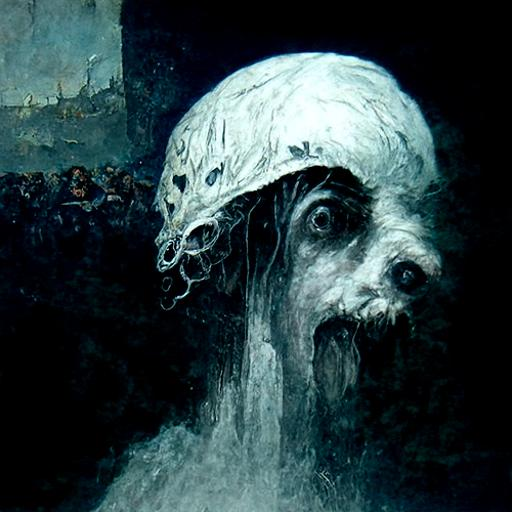

In [35]:
image_from_tensor